**Задание 1**

Загрузите файл HR.csv в pandas dataframe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [ ]:
hr = pd.read_csv('HR.csv', delimiter=',')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Задание 2**

Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


**Задание 3**

Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [ ]:
hr_new = hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
hr_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


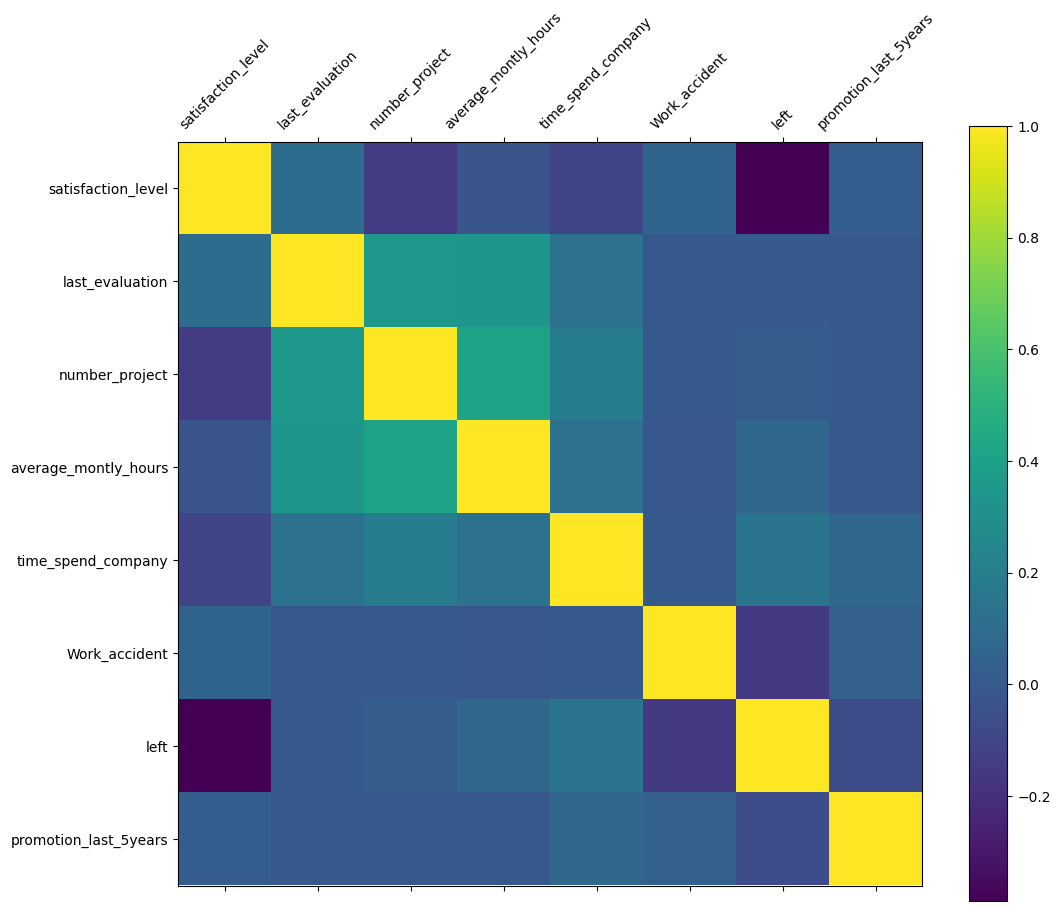

In [ ]:
f = plt.figure(figsize=(12, 10))
plt.matshow(hr_new.corr(), fignum=f.number)
plt.xticks(range(hr_new.shape[1]), hr_new.columns, fontsize=10, rotation=45)
plt.yticks(range(hr_new.shape[1]), hr_new.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

**Наиболее тесно коррелируют между собой :**

*  number_project / average_monthly_hours
*  number_project / last_evaluation


**Менее скоррелированы:**

*   left / satisfaction_level
*   left / Work_accident


**Задание 4**

Рассчитайте сколько сотрудников работает в каждом департаменте.

In [ ]:
hr.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

**Задание 5**

Показать распределение сотрудников по зарплатам.

<Axes: ylabel='salary'>

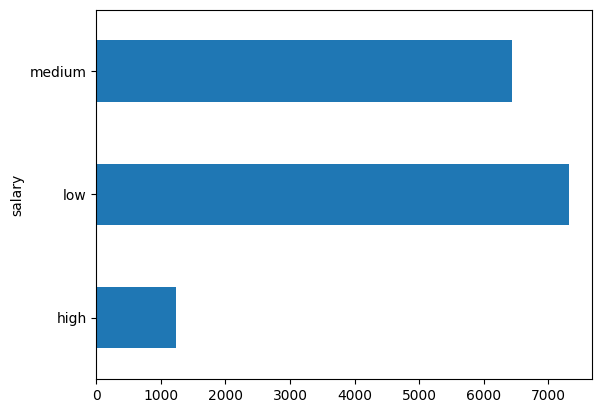

In [ ]:
hr.groupby('salary')['salary'].count().plot(kind="barh")

**Задание 6**

Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [ ]:
hr_department = hr.groupby([hr['department'],hr['salary']])[['salary']].count()
hr_department

salary
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

<Axes: ylabel='department,salary'>

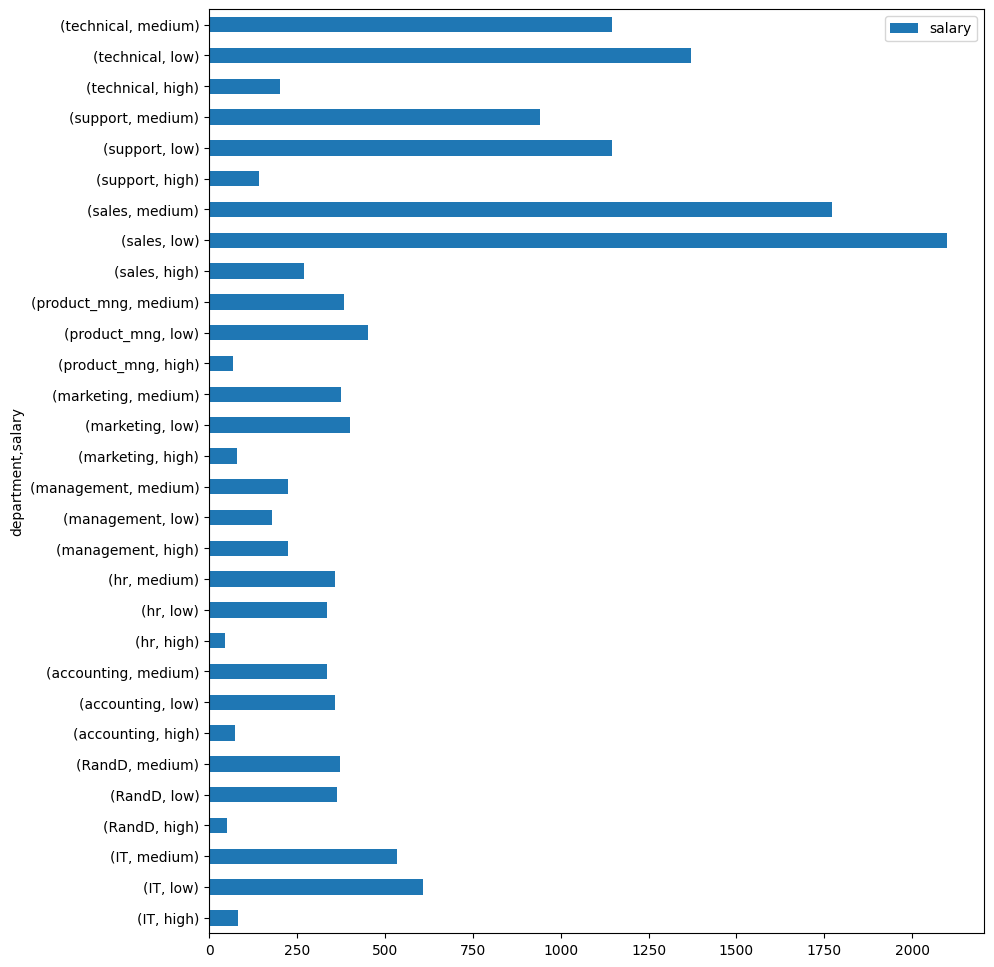

In [ ]:
hr_department.plot(kind="barh",figsize=(10,12))

**Задание 7**

Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
hr_high_sal = list(hr.loc[hr['salary'] == 'high']['average_montly_hours'])

In [ ]:
hr_low_sal = list(hr.loc[hr['salary'] == 'low']['average_montly_hours'])

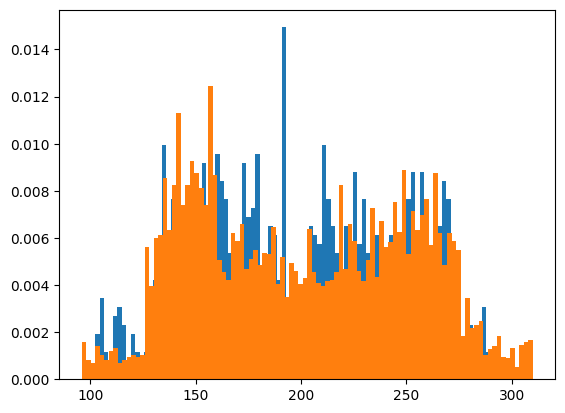

In [ ]:
plt.hist(hr_high_sal, bins=100, density=True);
plt.hist(hr_low_sal, bins=100, density=True);

In [ ]:
# проверим гипотезу при уровне значимости 0,05:
t, p = stats.ttest_ind(hr_high_sal, hr_low_sal)
print(t, p)

-0.7288680398062308 0.4661023478267259


**Значение "p" больше, значит гипотезу опровергаем: кол-во проведенного на работе времени не зависит от оклада**

**Задание 8**

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):




*   Доля сотрудников с повышением за последние 5 лет
*   Средняя степень удовлетворенности
*   Среднее количество проектов









In [ ]:
hr_left = hr.loc[hr['left'] == 1]
hr_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
left_prom5ye = round((len(hr_left.loc[hr_left['promotion_last_5years'] == 1])/len(hr_left))*100,2)
print(f'Доля ушедших сотрудников с повышением за последние 5 лет: {left_prom5ye}%')
left_satis = round(hr_left['satisfaction_level'].mean(),2)
print(f'Средняя степень удовлетворенности ушедших сотрудников: {left_satis}')
left_num_proj = round(hr_left['number_project'].mean(),2)
print(f'Среднее количество проектов у ушедших сотрудников: {left_num_proj}')

Доля ушедших сотрудников с повышением за последние 5 лет: 0.53%
Средняя степень удовлетворенности ушедших сотрудников: 0.44
Среднее количество проектов у ушедших сотрудников: 3.86


In [ ]:
hr_saved = hr.loc[hr['left'] == 0]
hr_saved.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [ ]:
saved_prom5ye = round((len(hr_saved.loc[hr_saved['promotion_last_5years'] == 1])/len(hr_saved))*100,2)
print(f'Доля сохраненных сотрудников с повышением за последние 5 лет: {saved_prom5ye}%')
saved_satis = round(hr_saved['satisfaction_level'].mean(),2)
print(f'Средняя степень удовлетворенности сохраненных сотрудников: {saved_satis}')
saved_num_proj = round(hr_saved['number_project'].mean(),2)
print(f'Среднее количество проектов у сохраненных сотрудников: {saved_num_proj}')

Доля сохраненных сотрудников с повышением за последние 5 лет: 2.63%
Средняя степень удовлетворенности сохраненных сотрудников: 0.67
Среднее количество проектов у сохраненных сотрудников: 3.79


**Вывод:**

Ушедшие сотрудники в среднем имели больше проектов и реже получали повышения за последние 5 лет, что делало их менее удовлетворенными.

**Задание 9**

Разделить данные на тестовую и обучающую выборки

Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

Оценить качество модели на тестовой выборки

In [ ]:
left = pd.array(hr_new['left'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hr_new[['satisfaction_level','last_evaluation','number_project',
                                                            'average_montly_hours','time_spend_company','Work_accident',
                                                            'promotion_last_5years']], left, test_size=0.20)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
2995,1,0
2996,0,0
2997,0,0
2998,1,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7633333333333333

**Вывод:**

Из задания №3 видно, что на фактор увольнения фактически влияют только степень удовлетворенности и факт наличия рабочих инцидентов. Остальные факторы незначительно коррелируют с увольнением, что объясняет попадание модели лишь в 76% случаев.